In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [9]:
review_json_path = '../raw_data/yelp_academic_dataset_review.json'

In [10]:
size = 1000
review = pd.read_json(review_json_path, lines=True,
                      dtype={'review_id':str,'user_id':str,
                             'business_id':str,'stars':int,
                             'date':str,'text':str,'useful':int,
                             'funny':int,'cool':int},
                      nrows=size)

In [11]:
review

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01
...,...,...,...,...,...,...,...,...,...
995,hg4vo-f_0BDSGPzMj-LrdA,HN-2o_s91nULyyIBa7x2Vg,b4PgITSqSWoPhyJ-Mjko7Q,3,0,1,0,"Mojo crepes aka when it was ""blue sky"" back in...",2016-07-25 03:48:17
996,CaoFEIT1oAsOPrfIT0L7mQ,4-zeuXyClhI43r2FleGEdw,xGXzsc-hzam-VArK6eTvtw,5,0,0,0,Divine ambiance. Red walls. Cold ones. Love mu...,2018-02-11 03:29:53
997,_RDqlhTily1mSmltqJAp0A,LK3NnWGLcnxU2i8PCHFaTA,VkV9tfARXGzUjqmRdze_WA,5,4,0,1,Went here for a birthday celebration. Birthda...,2010-03-12 18:41:22
998,EKbOCFXKiR_APXI2mXEsmw,mcPMdBzh8EJWATLvHp5H0A,_rt-Z934kfFzgG19nTrIcQ,5,0,0,0,Great drinks at the tequila bar! Cierra recomm...,2016-05-07 02:12:44


In [12]:
df = pd.read_json('../raw_data/yelp_academic_dataset_business.json', lines=True)

In [13]:
df_100 = df.sort_values('review_count', ascending=False).head(100)
df_100

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
64048,4CxF8c3MB7VAdY8zFb2cZQ,Voodoo Doughnut - Old Town,22 SW 3rd Ave,Portland,OR,97204,45.522612,-122.673084,3.5,9185,1,"{'RestaurantsPriceRange2': '1', 'BikeParking':...","Local Flavor, Food, Donuts, Wedding Chapels, E...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-21:0', '..."
113608,PrsvO1rzkgg6qFizlAoEtg,Mike's Pastry,300 Hanover St,Boston,MA,02113,42.364181,-71.054218,4.0,7298,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Candy Stores, Gelato, Food, Coffee & Tea, Rest...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
42375,OQ2oHkcWA8KNC1Lsvj1SBA,Screen Door,2337 E Burnside St,Portland,OR,97214,45.523086,-122.641680,4.5,7219,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Caterers, Restaurants, Breakfast & Brunch, Sou...","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'..."
25571,zioLxtBc9THNS2TOn9xW1w,Pok Pok,3226 SE Division St,Portland,OR,97202,45.504723,-122.632105,4.0,6221,0,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, Asian Fusion, Pan Asian, Thai, Fi...","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
145385,y2w6rFaO0XEiG5mFfOsiFA,Neptune Oyster,63 Salem St,Boston,MA,02113,42.363237,-71.055975,4.5,5115,1,"{'NoiseLevel': 'u'average'', 'RestaurantsAttir...","Arabian, Thai, American (Traditional), Live/Ra...","{'Monday': '11:30-21:30', 'Tuesday': '11:30-21..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88857,67bZm-KQQCwSat7_jmiVbA,Hopdoddy Burger Bar,"2438 W Anderson Ln, Ste100",Austin,TX,78757,30.357665,-97.733150,4.0,1760,1,"{'NoiseLevel': 'u'loud'', 'BusinessParking': '...","Food, Restaurants, Nightlife, Bars, Juice Bars...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
34702,uPWJtYJi76EniU0xrX-zbA,Odd Duck,1201 S Lamar Blvd,Austin,TX,78704,30.254520,-97.762064,4.5,1757,1,"{'OutdoorSeating': 'True', 'RestaurantsTableSe...","Restaurants, Seafood, American (New), Nightlif...","{'Monday': '0:0-0:0', 'Tuesday': '17:0-20:30',..."
126547,EbUZhM4fLpsWQ8fpBhhgEQ,Mike & Patty's,12 Church St,Boston,MA,02116,42.348561,-71.067928,4.5,1756,1,"{'RestaurantsPriceRange2': '1', 'RestaurantsGo...","Coffee & Tea, Sandwiches, American (New), Brea...","{'Monday': '8:0-14:0', 'Tuesday': '8:0-14:0', ..."
128526,7Z-_gjvhLDmxYtaJTwow0w,JCT Kitchen & Bar,"1198 Howell Mill Rd, Ste 18",Atlanta,GA,30318,33.786631,-84.412421,4.0,1747,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Nightlife, Kitchen & Bath, Home & Garden, Shop...","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."


In [14]:
df_100['review_count'].sum()

279460

In [16]:
chunk_list = []
for chunk_review in review:
    chunk_review = chunk_review.rename(columns={'stars': 'review_stars'})
    chunk_merged = pd.merge(df_100, chunk_review, on='business_id', how='inner')
    print(f"{chunk_merged.shape[0]} out of {size:,} related reviews")
    chunk_list.append(chunk_merged)
# After trimming down the review file, concatenate all relevant data back to one dataframe
df_sample = pd.concat(chunk_list, ignore_index=True, join='outer', axis=0)

AttributeError: 'str' object has no attribute 'rename'

In [9]:
df_sample

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,categories,hours,review_id,user_id,review_stars,useful,funny,cool,text,date
0,zioLxtBc9THNS2TOn9xW1w,Pok Pok,3226 SE Division St,Portland,OR,97202,45.504723,-122.632105,4.0,6221,...,"Restaurants, Asian Fusion, Pan Asian, Thai, Fi...","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:...",11dxTnXVwrZdCR9d5C_9UQ,FIe1uIvQGWxsx-oDrmkETQ,5,1,0,0,Atmosphere: Nailed it. the outdoor patio is or...,2015-03-18 18:52:02
1,zioLxtBc9THNS2TOn9xW1w,Pok Pok,3226 SE Division St,Portland,OR,97202,45.504723,-122.632105,4.0,6221,...,"Restaurants, Asian Fusion, Pan Asian, Thai, Fi...","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:...",BodsYZss14ixFZ6nVy5__Q,MJ9GzJTVMJ6ho_lD5I3ezQ,4,1,1,0,This place felt VERY authentic (down to the ri...,2015-04-01 20:44:17
2,zioLxtBc9THNS2TOn9xW1w,Pok Pok,3226 SE Division St,Portland,OR,97202,45.504723,-122.632105,4.0,6221,...,"Restaurants, Asian Fusion, Pan Asian, Thai, Fi...","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:...",Aypv0yKI5hgkE2RQOE_Aew,8U5e705FlCAHWQUrcTC2cA,4,0,0,0,"The chicken wings were da BOMB, if you're unsu...",2017-08-08 00:30:29
3,zioLxtBc9THNS2TOn9xW1w,Pok Pok,3226 SE Division St,Portland,OR,97202,45.504723,-122.632105,4.0,6221,...,"Restaurants, Asian Fusion, Pan Asian, Thai, Fi...","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:...",pklGVB06gmDpSr2pL9MoWQ,GGjlMc15S4iOS8tZ7Jka5A,1,9,1,1,OVERRATED!!!\n\nI'm from out of state and I ca...,2014-01-17 08:36:57
4,zioLxtBc9THNS2TOn9xW1w,Pok Pok,3226 SE Division St,Portland,OR,97202,45.504723,-122.632105,4.0,6221,...,"Restaurants, Asian Fusion, Pan Asian, Thai, Fi...","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:...",m_Nl76RaDuQ0VbGtjsqzXQ,R-89TWF2Sgd0oEVIcRDu5w,4,3,0,2,Delicious street vendor style Thai / SE Asian ...,2009-09-08 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285664,FmAIHFqUBNkCw3YBCRQLmQ,Redbones BBQ,55 Chester St,Somerville,MA,02144,42.395192,-71.122370,3.5,1774,...,"Steakhouses, Southern, Beer, Wine & Spirits, F...","{'Monday': '11:30-23:0', 'Tuesday': '11:30-0:3...",7LaOkhpYOklCBbb_yfHhHQ,tubTjAG9LgBJtnZ1VTScJA,1,0,0,0,One of the worst meals I have had in a long ti...,2021-01-24 03:29:51
285665,FmAIHFqUBNkCw3YBCRQLmQ,Redbones BBQ,55 Chester St,Somerville,MA,02144,42.395192,-71.122370,3.5,1774,...,"Steakhouses, Southern, Beer, Wine & Spirits, F...","{'Monday': '11:30-23:0', 'Tuesday': '11:30-0:3...",QULBtfJBgI4JABZVhJciOA,UUGoHkOlnlaro0ddCREO9w,5,0,0,0,Great BBQ spot in Davis Square. The beer sele...,2020-09-10 15:54:20
285666,FmAIHFqUBNkCw3YBCRQLmQ,Redbones BBQ,55 Chester St,Somerville,MA,02144,42.395192,-71.122370,3.5,1774,...,"Steakhouses, Southern, Beer, Wine & Spirits, F...","{'Monday': '11:30-23:0', 'Tuesday': '11:30-0:3...",fE3MW9_Xh2Bcy94hsOIeSQ,SheRe5QfVj0ik9hMewJe5Q,4,2,0,2,I've been in Somerville almost a year and neve...,2010-06-02 01:18:12
285667,FmAIHFqUBNkCw3YBCRQLmQ,Redbones BBQ,55 Chester St,Somerville,MA,02144,42.395192,-71.122370,3.5,1774,...,"Steakhouses, Southern, Beer, Wine & Spirits, F...","{'Monday': '11:30-23:0', 'Tuesday': '11:30-0:3...",yMY49kRVan0TThP8fG0dIA,9HzxUunoGjVvZXask0urqA,5,0,0,0,Love redbone we got takeout tonight was very g...,2020-06-20 01:27:13


/Users/pedrofranca/.pyenv/versions/3.8.6/envs/Sentimedia/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


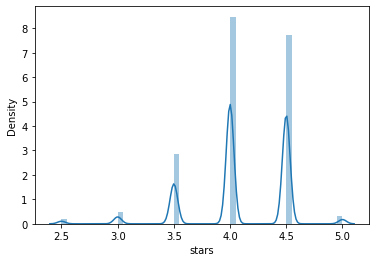

In [10]:
sns.distplot(df_sample['stars']);

In [11]:
import spacy
import scattertext
nlp = spacy.load('en_core_web_sm')

ModuleNotFoundError: No module named 'scattertext'

In [19]:
from wordcloud import WordCloud, STOPWORDS
import string

In [20]:
def clean_text(s):
    s = s.translate(str.maketrans('', '', string.punctuation))
    s = s.lower()
    return s.split()

In [47]:
df_1 = df_sample[df_sample['business_id']=='4CxF8c3MB7VAdY8zFb2cZQ']

In [63]:
df_1.shape

(9295, 22)

In [73]:
type(df_1.text)

pandas.core.series.Series

In [49]:
text_1 = [clean_text(x) for x in df_1.text]

In [54]:
text_1 = [item for sublist in text_1 for item in sublist]

9295

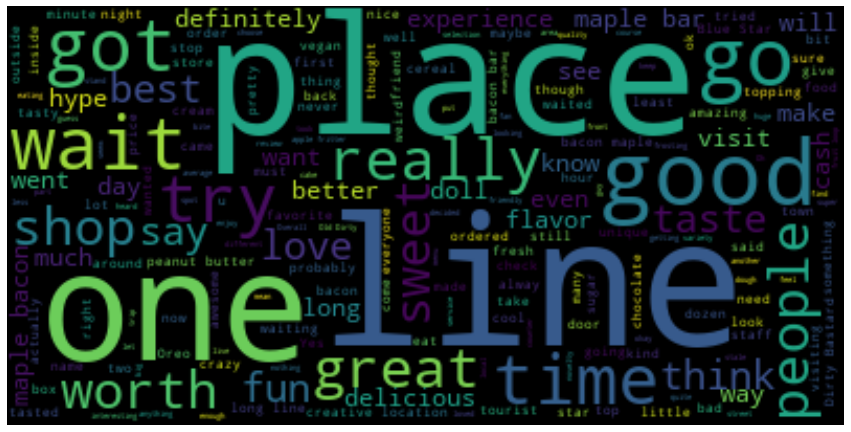

In [72]:
stopwords = set(STOPWORDS)
stopwords.update(["donut","donuts" ,"doughnut","doughnuts","Voodoo", "Portland"])

wordcloud = WordCloud(stopwords=stopwords).generate(' '.join(df_1.text))

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [77]:
df_good = df_sample[df_sample['review_stars']>3]

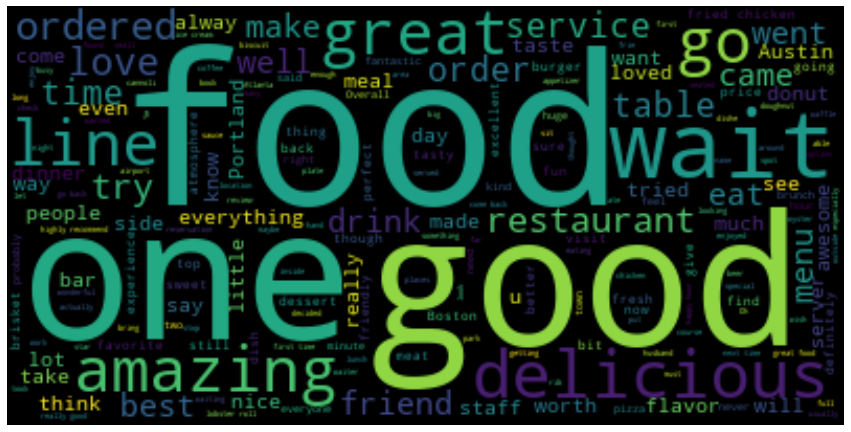

In [79]:
stopwords = set(STOPWORDS)
stopwords.update(["place","got"])
wordcloud = WordCloud(stopwords=stopwords).generate(' '.join(df_good.text))

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

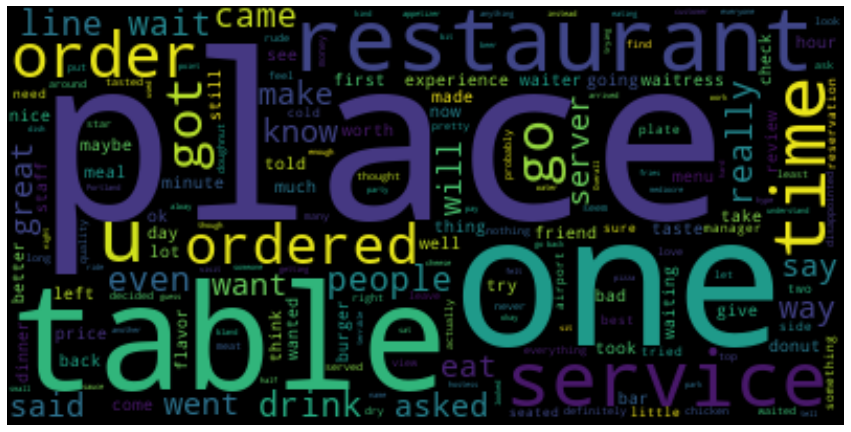

In [82]:
df_bad = df_sample[df_sample['review_stars']<3]
stopwords = set(STOPWORDS)
stopwords.update(["food","good"])
wordcloud = WordCloud(stopwords=stopwords).generate(' '.join(df_bad.text))

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()